In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key

In [4]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name)

# Set up list to pull in the data
cityname= []
lat= []
lng= []
max_temp = []
humidity = []
cloudiness = []
wind_speed= []
country= []
date= []
count = 0

#Loop through cities to pull out weather data
for city in cities:
    weather_response= requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json= weather_response.json()
    #Set up try/except to skip over the cities that do not have information.
    try:
        cityname.append(weather_json['city']['name'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("Done")

Processing record 1 of Set 1 | hobart
Processing record 2 of Set 1 | bluff
Processing record 3 of Set 1 | luderitz
Processing record 4 of Set 1 | albany
Processing record 5 of Set 1 | pula
Processing record 6 of Set 1 | butaritari
Processing record 7 of Set 1 | kondinskoye
Record not found
Processing record 8 of Set 1 | bambous virieux
Processing record 9 of Set 1 | genhe
Processing record 10 of Set 1 | mataura
Processing record 11 of Set 1 | sangmelima
Record not found
Processing record 12 of Set 1 | tuktoyaktuk
Record not found
Processing record 13 of Set 1 | yining
Processing record 14 of Set 1 | east london
Processing record 15 of Set 1 | puerto ayora
Processing record 16 of Set 1 | rikitea
Processing record 17 of Set 1 | saryozek
Processing record 18 of Set 1 | barstow
Processing record 19 of Set 1 | sistranda
Processing record 20 of Set 1 | faanui
Processing record 21 of Set 1 | pangnirtung
Processing record 22 of Set 1 | chuy
Processing record 23 of Set 1 | ribeira grande
Proces

Processing record 191 of Set 1 | portland
Processing record 192 of Set 1 | lompoc
Record not found
Processing record 193 of Set 1 | colquechaca
Record not found
Processing record 194 of Set 1 | rio grande
Processing record 195 of Set 1 | verkhoyansk
Processing record 196 of Set 1 | verkhnevilyuysk
Processing record 197 of Set 1 | toora-khem
Processing record 198 of Set 1 | college
Processing record 199 of Set 1 | mana
Processing record 200 of Set 1 | rapid valley
Processing record 201 of Set 1 | clyde river
Processing record 202 of Set 1 | tual
Processing record 203 of Set 1 | ati
Processing record 204 of Set 1 | norman wells
Processing record 205 of Set 1 | madingou
Processing record 206 of Set 1 | vardo
Processing record 207 of Set 1 | san patricio
Processing record 208 of Set 1 | peniche
Record not found
Processing record 209 of Set 1 | taoudenni
Processing record 210 of Set 1 | saint-pierre
Processing record 211 of Set 1 | saskylakh
Processing record 212 of Set 1 | korem
Processing

Processing record 379 of Set 1 | avarua
Processing record 380 of Set 1 | mahebourg
Processing record 381 of Set 1 | lorengau
Processing record 382 of Set 1 | mukhen
Record not found
Processing record 383 of Set 1 | krasnoarmeysk
Record not found
Processing record 384 of Set 1 | bang saphan
Processing record 385 of Set 1 | saint andrews
Processing record 386 of Set 1 | wamba
Record not found
Processing record 387 of Set 1 | tucurui
Record not found
Processing record 388 of Set 1 | tumbes
Processing record 389 of Set 1 | port blair
Processing record 390 of Set 1 | kodinsk
Processing record 391 of Set 1 | koppang
Processing record 392 of Set 1 | itamaraca
Processing record 393 of Set 1 | yankton
Processing record 394 of Set 1 | kamalapuram
Processing record 395 of Set 1 | vostok
Processing record 396 of Set 1 | batemans bay
Processing record 397 of Set 1 | khani
Processing record 398 of Set 1 | comodoro rivadavia
Processing record 399 of Set 1 | sao filipe
Processing record 400 of Set 1 |

In [5]:
# Create DataFram
city_data = pd.DataFrame({"City": cityname,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,51.62,61,54,5.97,AU,1595473200
1,Bluff,-46.6000,168.3333,44.56,75,90,23.26,NZ,1595473200
2,Lüderitz,-26.6481,15.1594,65.48,37,0,5.14,NA,1595473200
3,Albany,42.6001,-73.9662,71.26,92,89,4.16,US,1595473200
4,Pula,44.8683,13.8481,74.46,72,76,4.97,HR,1595473200
...,...,...,...,...,...,...,...,...,...
554,Itapaci,-14.9508,-49.5494,67.15,44,0,2.59,BR,1595473200
555,Kiama,-34.6833,150.8667,59.74,66,2,6.55,AU,1595473200
556,Caravelas,-17.7125,-39.2481,67.53,71,0,1.95,BR,1595473200
557,Golden,39.7555,-105.2211,72.30,41,87,15.05,US,1595473200


In [6]:
# Save city data into a csv file
city_data.to_csv('city_data.csv')

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

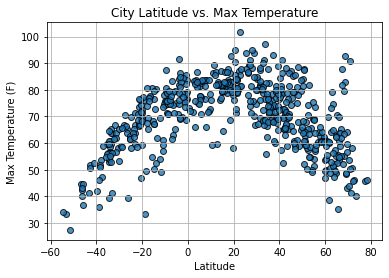

In [7]:
# Plotting the Data
# Temperature (F) vs. Latitude
x_lat = city_data["Lat"]
y_temp= city_data["Max Temp"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

This graph shows the relationship between latitude and the max temperature. As the latitude gets closer to 0, the max temperature increases. 

Text(0.5, 1.0, 'City Latitude vs. Humidity')

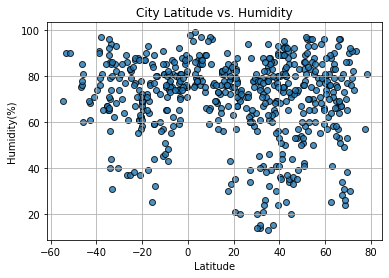

In [8]:
# Humidity (%) vs. Latitude
y_temp= city_data["Humidity"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

The city latitude vs. humidity graph plots the relationship between latitude and humidity. It does not seem like there is a correlation between latitude and humidity

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

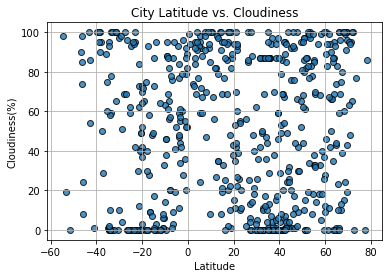

In [9]:
# Cloudiness (%) vs. Latitude
y_temp= city_data["Cloudiness"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

The city latitude vs. cloudiness graph plots the relationship between latitude and cloudiness. Like the humidity graph, it does not seem like there is a correlation between latitude and cloudiness.

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

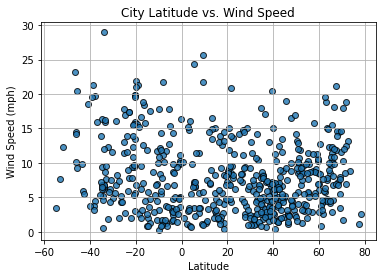

In [10]:
# Wind Speed (mph) vs. Latitude
y_temp= city_data["Wind Speed"]
plt.scatter(x_lat,y_temp, alpha=.8, edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

The city latitude vs. wind speed graph shows the relationship between latitude and wind speed. 

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plt_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_data.loc[city_data["Lat"] >= 0,:]
southern = city_data.loc[city_data["Lat"] < 0,:]

The r-squared is: -0.6340540284297682


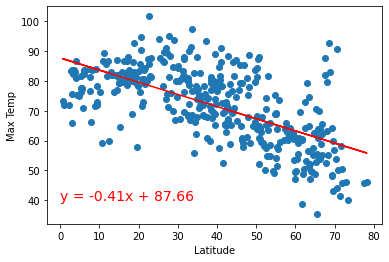

In [13]:
# Northern Hemishphere Latitude vs. Max Termperature
xn_lat = northern["Lat"]
yn_temp = northern["Max Temp"]
plt_linear_regression(xn_lat,yn_temp,'Max Temp',(0,40))
plt.show()

The r-squared is: 0.788601388842413


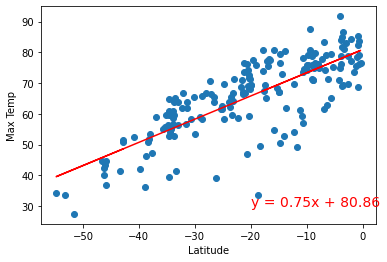

In [14]:
# Southern Hemishphere Latitude vs. Max Termperature
xs_lat = southern["Lat"]
ys_temp = southern["Max Temp"]
plt_linear_regression(xs_lat,ys_temp,'Max Temp',(-20,30))

plt.show()

The r-squared is: -0.09574091131083805


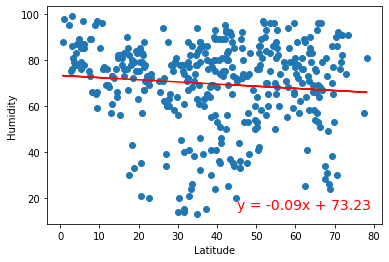

In [15]:
# Northern Latitude vs. Humidity
xn_lat = northern["Lat"]
yn_humid = northern["Humidity"]
plt_linear_regression(xn_lat,yn_humid,'Humidity',(45,15))

plt.show()

The r-squared is: -0.028800124714296594


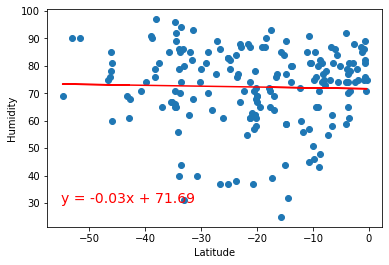

In [16]:
# Southern Latitude vs. Humidity
xs_lat = southern["Lat"]
ys_humid = southern["Humidity"]
plt_linear_regression(xs_lat,ys_humid,'Humidity',(-55,30))

plt.show()

The r-squared is: -0.06934229249408216


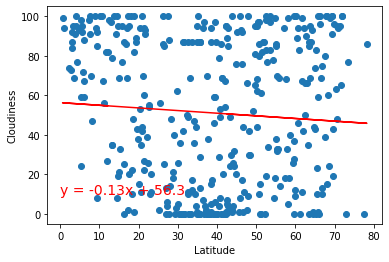

In [17]:
# Northern Latitude vs. Cloudiness
xn_lat = northern["Lat"]
yn_cloud = northern["Cloudiness"]
plt_linear_regression(xn_lat,yn_cloud,'Cloudiness',(0,10))

plt.show()

The r-squared is: -0.04157862662350075


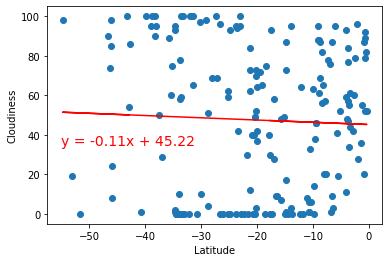

In [18]:
# Southern Latitude vs. Cloudiness
xs_lat = southern["Lat"]
ys_cloud = southern["Cloudiness"]
plt_linear_regression(xs_lat,ys_cloud,'Cloudiness',(-55,35))

plt.show()

The r-squared is: 0.10576353255241619


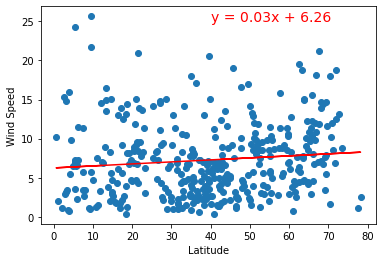

In [19]:
# Northern Latitude vs. Wind Speed
xn_lat = northern["Lat"]
yn_wind = northern["Wind Speed"]
plt_linear_regression(xn_lat,yn_wind,'Wind Speed',(40,25))

plt.show()

The r-squared is: -0.21911685756821597


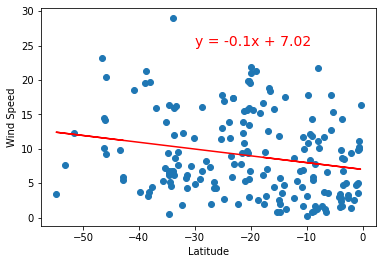

In [20]:
# Southern Latitude vs. Wind Speed
xs_lat = southern["Lat"]
ys_wind = southern["Wind Speed"]
plt_linear_regression(xs_lat,ys_wind,'Wind Speed',(-30,25))

plt.show()

Observations

1. When you seperate the data into northern hemisphere and southern hemisphere, you can see the correlation between latitude and max temperature better. 
2. There is a moderate negative correlation between latitude and max temperature for the northen hemisphere. While the southern hemisphere has a strong positive correlation between latitude and max temperature. 
3. There is a weak correlation between latitude and the other variables we compared. The r-squared value for all of these relationships is less than .3.